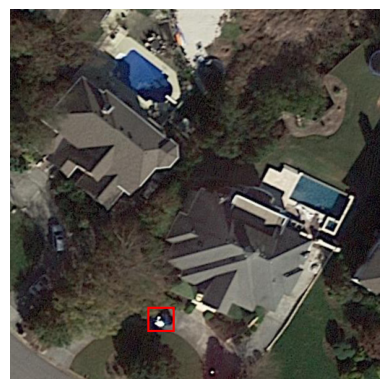

In [1]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

def draw_box(image_path, pixel_boxes):
    img = Image.open(image_path).convert("RGB")
    width, height = img.size
    draw = ImageDraw.Draw(img)
    
    for x_min, y_min, x_max, y_max in pixel_boxes:
        
        # Normalize the coordinates (0.0 to 1.0)
        nx_min = x_min / 1000
        ny_min = y_min / 1000
        nx_max = x_max / 1000
        ny_max = y_max / 1000
        
        # Denormalize/Multiply back to pixel dimensions for drawing
        draw_x_min = int(nx_min * width)
        draw_y_min = int(ny_min * height)
        draw_x_max = int(nx_max * width)
        draw_y_max = int(ny_max * height)
        
        draw.rectangle(
            [(draw_x_min, draw_y_min), (draw_x_max, draw_y_max)], 
            outline="red", 
            width=3
        )
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

dummy_img = Image.new('RGB', (600, 400), color='lightgray')
dummy_img.save('pixel_test_image.jpg')

# Coordinates are raw pixel values (0 to 600, 0 to 400)
boxes = [
    (373, 805, 445, 873),  # Top-left box
]
# #"pred_bbox": [
#       0.3735577063903088,
#       0.8050481221240865,
#       0.4454327029839283,
#       0.8723257639843119
#     ],
# 3. Call the function
draw_box('/home/teaching/Desktop/geo_kabir/roughwork/images/P0331_0008.png', boxes)

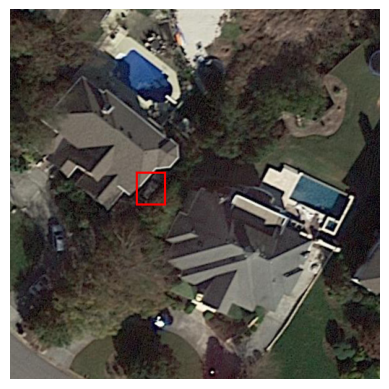

In [1]:
#0.34, 0.44, 0.42, 0.53]
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

def draw_box(image_path, pixel_boxes):
    img = Image.open(image_path).convert("RGB")
    width, height = img.size
    draw = ImageDraw.Draw(img)
    
    for x_min, y_min, x_max, y_max in pixel_boxes:
        
        # Normalize the coordinates (0.0 to 1.0)
        nx_min = x_min / 1000
        ny_min = y_min / 1000
        nx_max = x_max / 1000
        ny_max = y_max / 1000
        
        # Denormalize/Multiply back to pixel dimensions for drawing
        draw_x_min = int(nx_min * width)
        draw_y_min = int(ny_min * height)
        draw_x_max = int(nx_max * width)
        draw_y_max = int(ny_max * height)
        
        draw.rectangle(
            [(draw_x_min, draw_y_min), (draw_x_max, draw_y_max)], 
            outline="red", 
            width=3
        )
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()

dummy_img = Image.new('RGB', (600, 400), color='lightgray')
dummy_img.save('pixel_test_image.jpg')

# Coordinates are raw pixel values (0 to 600, 0 to 400)
boxes = [
    (340, 440, 420, 530),  # Top-left box
]
# #"pred_bbox": [
#       0.3735577063903088,
#       0.8050481221240865,
#       0.4454327029839283,
#       0.8723257639843119
#     ],
# 3. Call the function
draw_box('/home/teaching/Desktop/geo_kabir/roughwork/images/P0331_0008.png', boxes)


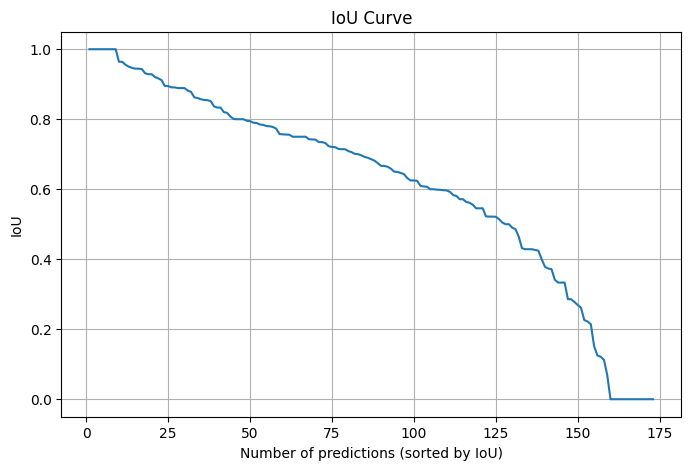

In [3]:
import json
import matplotlib.pyplot as plt

# Load the IoU curve (count → IoU)
with open("/home/teaching/Desktop/geo_kabir/iou_curve.json", "r") as f:
    curve = json.load(f)

# Convert to lists
counts = list(map(int, curve.keys()))
ious = list(curve.values())

# Sort by count (x-axis)
counts, ious = zip(*sorted(zip(counts, ious)))

# Plot
plt.figure(figsize=(8, 5))
plt.plot(counts, ious)
plt.xlabel("Number of predictions (sorted by IoU)")
plt.ylabel("IoU")
plt.title("IoU Curve")
plt.grid(True)
plt.show()
